In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
file_path = 'spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

In [91]:
data.head()

,labels,data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [93]:
data.columns

Index(['labels', 'data', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [95]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [97]:
data.head()

,labels,data
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
data['labels'] = data['labels'].map({'not spam': 0 , 'spam': 1 })

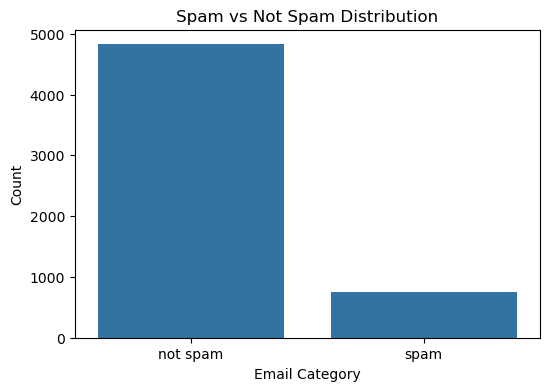

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(x='labels', data=data)
plt.title("Spam vs Not Spam Distribution")
plt.xticks(ticks=[0, 1], labels=['not spam', 'spam'])
plt.xlabel("Email Category")
plt.ylabel("Count")
plt.show()

In [103]:
max_words = 10000
max_len = 100  

In [105]:
import tensorflow as tf

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

In [109]:
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')

In [111]:
tokenizer.fit_on_texts(data['data'])

In [113]:
word_index = tokenizer.word_index

In [115]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
sequences = tokenizer.texts_to_sequences(data['data'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [119]:
embedding_dim = 100
embeddings_index = {}

In [121]:
glove_path = 'glove.6B.100d.txt'

In [123]:
from tensorflow.keras.initializers import Constant

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [127]:
glove_path = 'glove.6B.100d.txt'
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefficients

In [128]:
embedding_matrix = np.zeros((max_words, embedding_dim))

In [129]:
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [130]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['labels'], test_size=0.15, random_state=42)

In [131]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len,
    embeddings_initializer=Constant(embedding_matrix), trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [132]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8617 - loss: 0.4886 - val_accuracy: 0.8660 - val_loss: 0.3947
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8592 - loss: 0.4122 - val_accuracy: 0.8660 - val_loss: 0.3942
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8714 - loss: 0.3912 - val_accuracy: 0.8660 - val_loss: 0.3948
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8758 - loss: 0.3814 - val_accuracy: 0.8660 - val_loss: 0.3951
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8668 - loss: 0.3996 - val_accuracy: 0.8660 - val_loss: 0.3939
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8658 - loss: 0.3962 - val_accuracy: 0.8660 - val_loss: 0.3941
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8599 - loss: 0.4085 - val_accuracy: 0.8660 - val_loss: 0.3939
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8718 - loss: 0.3896 - val_accu

In [140]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [141]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


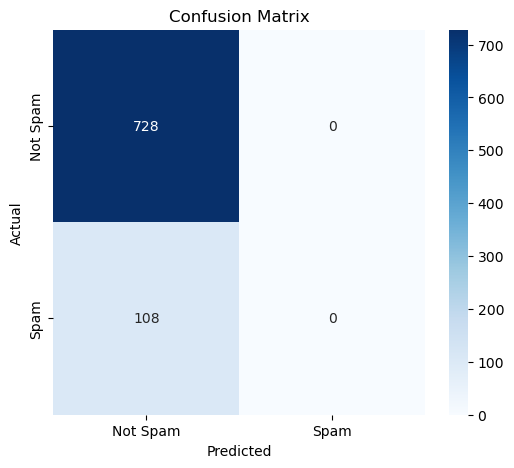

In [142]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

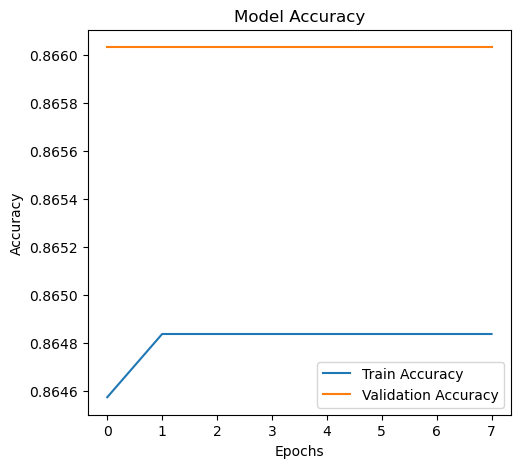

In [143]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

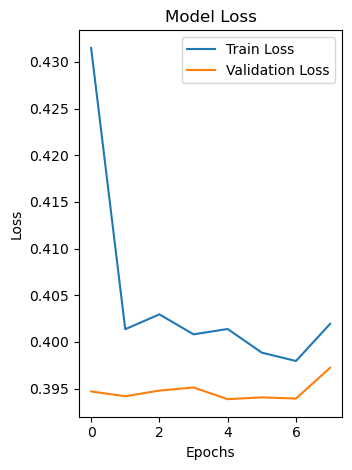

In [144]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [145]:
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8708
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       728
           1       0.00      0.00      0.00       108

    accuracy                           0.87       836
   macro avg       0.44      0.50      0.47       836
weighted avg       0.76      0.87      0.81       836



In [83]:
# model = model.save('spam_detection_lstm_glove.h5')